# GEORGE PAMFILIS SHIP FLAG ANALYSIS FOR GREECE

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os

In [5]:
plt.style.use('ggplot')

In [6]:
%matplotlib inline

In [7]:
files = os.listdir('./DATA_FLAGS/')
print(files)

['σημαία_2005.xls', 'σημαία_2006.xls', 'σημαία_2007.xls', 'σημαία_2008.xls', 'σημαία_2010.xls', 'σημαία_2011.xls', 'σημαία_2012.xls', 'σημαία_2013.xls', 'σημαία_2014.xls', 'σημαία_2015.xlsx', 'σημαία_2016.xls']


In [8]:
sheets = ['Sheet1','Sheet2','Sheet3','Sheet4']
quarters = ['A','B','C','D']

In [11]:
dfs = []
for f in files:
    print(f)
    for s, quarter in enumerate(quarters):
        df = pd.read_excel('./DATA_FLAGS/'+f,sheet_name=sheets[s])
        df['quarter'] = quarter
        df['year'] = int(f.split('_')[1].split('.')[0])
        dfs.append(df)

σημαία_2005.xls
σημαία_2006.xls
σημαία_2007.xls
σημαία_2008.xls
σημαία_2010.xls
σημαία_2011.xls
σημαία_2012.xls
σημαία_2013.xls
σημαία_2014.xls
σημαία_2015.xlsx
σημαία_2016.xls


In [12]:
data = pd.concat(dfs, ignore_index=True).sort_values(by=['year','quarter','passengers_arriving'])
data.index = range(data.shape[0])

In [13]:
data = data.replace(np.nan,0)

In [14]:
data.head()

,flag,arrivals,embarked,passengers_arriving,disembarked,quarter,year
0,Τουρκική,6.0,13.0,336.0,0.0,A,2005
1,Κυπριακή,3.0,0.0,1421.0,0.0,A,2005
2,Παναμαϊκή,3.0,0.0,2734.0,0.0,A,2005
3,Λοιπές,9.0,0.0,3554.0,0.0,A,2005
4,Ελληνική,12.0,0.0,21603.0,0.0,A,2005


In [15]:
years=data.year.drop_duplicates().values
years

array([2005, 2006, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

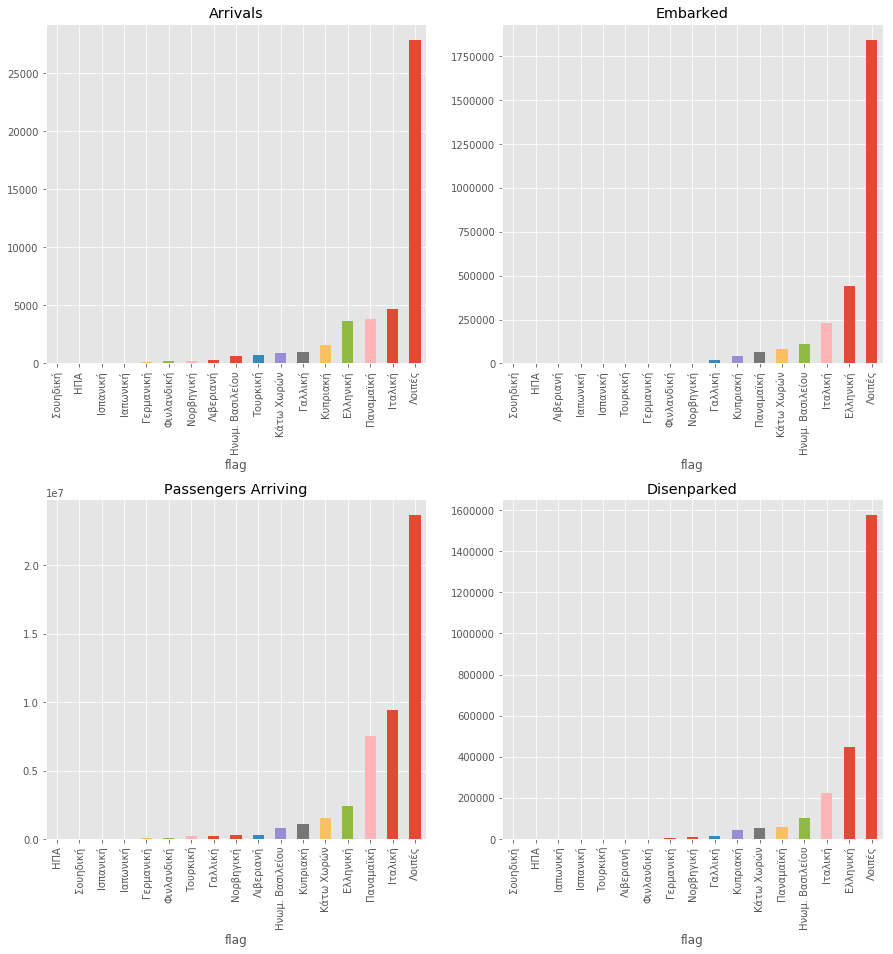

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
data.groupby(['flag']).sum().sort_values(by=['arrivals']).arrivals.plot(kind='bar',ax=ax[0, 0])
data.groupby(['flag']).sum().sort_values(by=['embarked']).embarked.plot(kind='bar',ax=ax[0, 1])
data.groupby(['flag']).sum().sort_values(by=['passengers_arriving']).passengers_arriving.plot(kind='bar',ax=ax[1, 0])
data.groupby(['flag']).sum().sort_values(by=['disembarked']).disembarked.plot(kind='bar',ax=ax[1, 1])
ax[0, 0].set_title('Arrivals');
ax[0, 1].set_title('Embarked');
ax[1, 0].set_title('Passengers Arriving');
ax[1, 1].set_title('Disenparked');
plt.subplots_adjust(hspace = .4)

## BY QUARTER

## Passengers Arriving

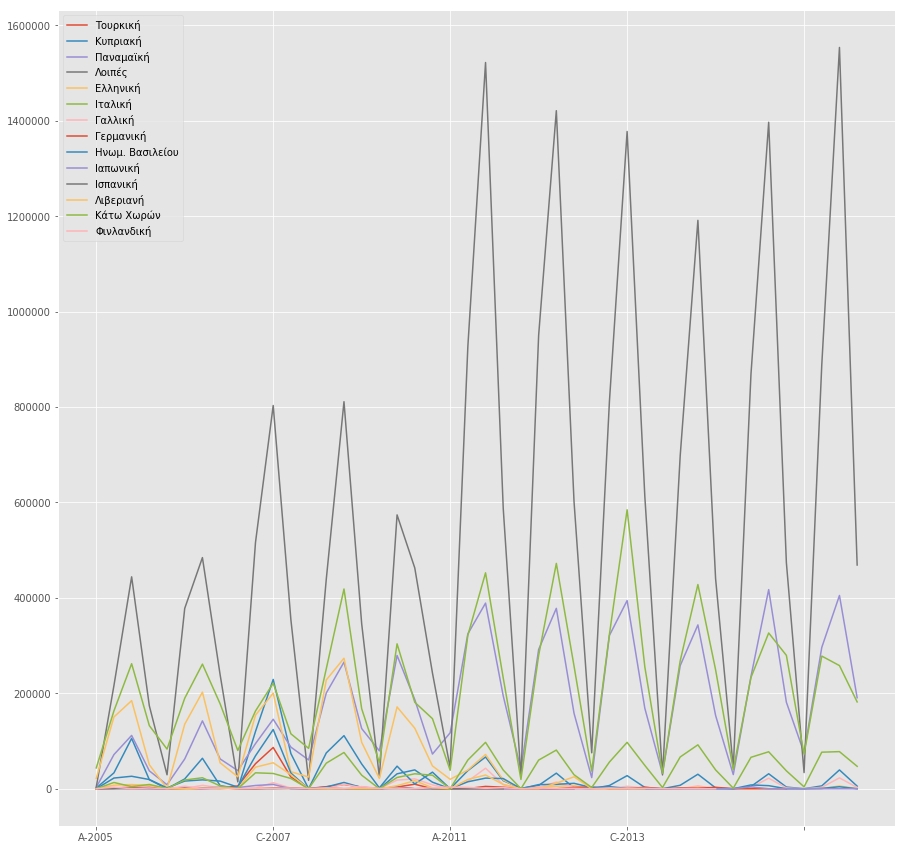

In [17]:
plt.figure(figsize=(15,15))
for country in data.flag.drop_duplicates().values[:-3]:
#     print(country)
    d = data[data.flag==country]
#     print(d)
#     print(country, d.shape)
    d.index = range(d.shape[0])
    labels = d.quarter + str('-') + d.year.astype(str)
    d.index = labels
    d.passengers_arriving.plot(label=country)
#     plt.xticks(d.index, labels, rotation='vertical');
plt.legend()

In [18]:
d

,flag,arrivals,embarked,passengers_arriving,disembarked,quarter,year
A-2005,Φινλανδική,0.0,0.0,0.0,0.0,A,2005
B-2005,Φινλανδική,21.0,198.0,3396.0,321.0,B,2005
C-2005,Φινλανδική,0.0,0.0,0.0,0.0,C,2005
D-2005,Φινλανδική,10.0,206.0,1577.0,132.0,D,2005
A-2006,Φινλανδική,0.0,0.0,0.0,0.0,A,2006
B-2006,Φινλανδική,28.0,102.0,5188.0,170.0,B,2006
C-2006,Φινλανδική,3.0,0.0,626.0,0.0,C,2006
D-2006,Φινλανδική,10.0,203.0,2047.0,204.0,D,2006
A-2007,Φινλανδική,0.0,0.0,0.0,0.0,A,2007
B-2007,Φινλανδική,4.0,0.0,823.0,2.0,B,2007


## Arrivals

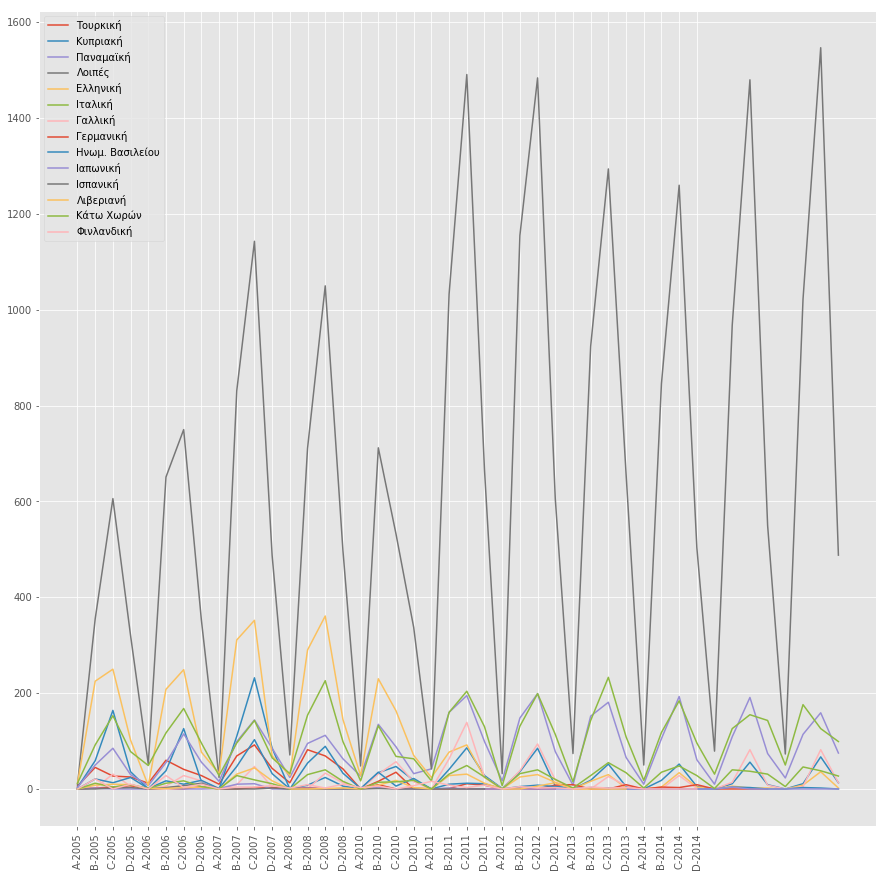

In [19]:
plt.figure(figsize=(15,15))
for country in data.flag.drop_duplicates().values[:-3]:
    d = data[data.flag==country]
#     print(d)
#     print(country, d.shape)
    d.index = range(d.shape[0])
    labels = d.quarter + str('-') + d.year.astype(str)
    d.arrivals.plot(label=country)
    plt.xticks(d.index, labels, rotation='vertical');
plt.legend()

## Embarked

Τουρκική (28, 7)
Κυπριακή (44, 7)
Παναμαϊκή (44, 7)
Λοιπές (44, 7)
Ελληνική (44, 7)
Ιταλική (44, 7)
Γαλλική (44, 7)
Γερμανική (40, 7)
Ηνωμ. Βασιλείου (44, 7)
Ιαπωνική (44, 7)
Ισπανική (24, 7)
Λιβεριανή (32, 7)
Κάτω Χωρών (44, 7)
Φινλανδική (36, 7)


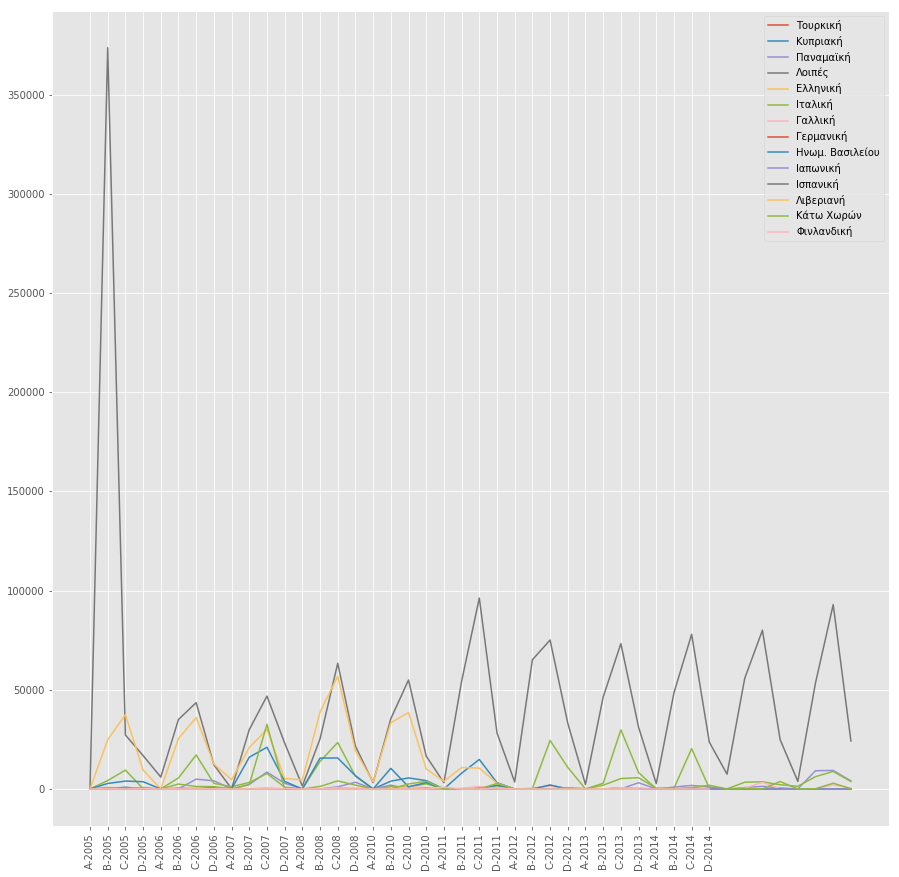

In [20]:
plt.figure(figsize=(15,15))
for country in data.flag.drop_duplicates().values[:-3]:
    d = data[data.flag==country]
#     print(d)
    print(country, d.shape)
    d.index = range(d.shape[0])
    labels = d.quarter + str('-') + d.year.astype(str)
    d.embarked.plot(label=country)
    plt.xticks(d.index, labels, rotation='vertical');
plt.legend()

## Disembarked

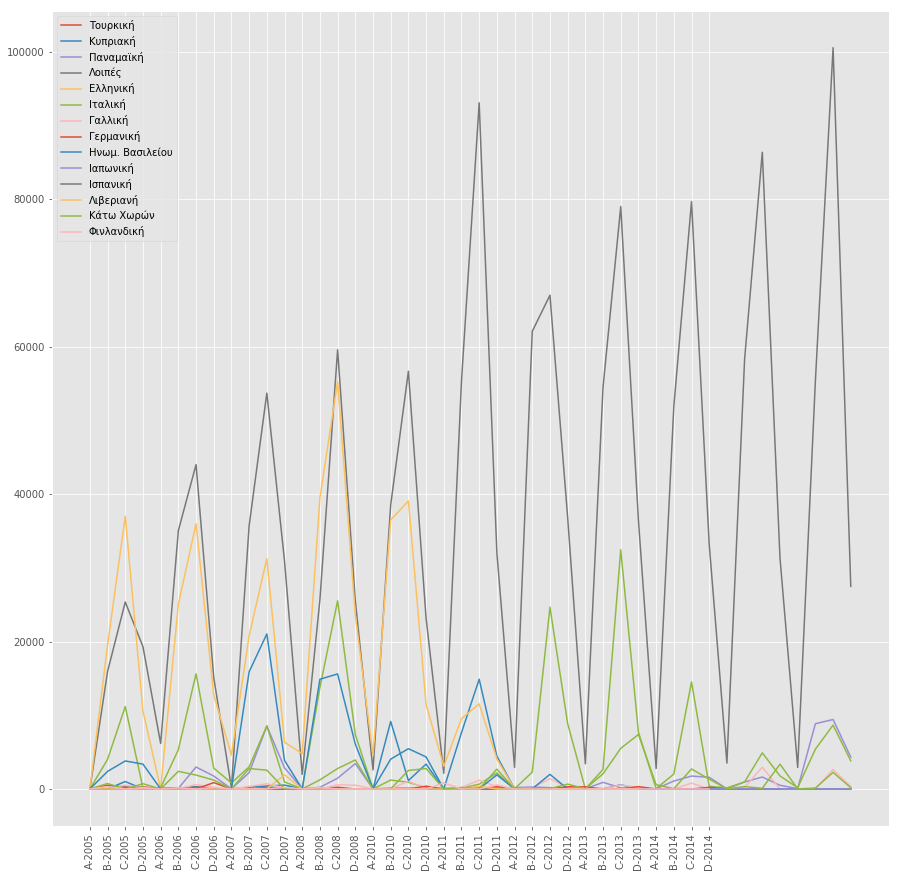

In [21]:
plt.figure(figsize=(15,15))
for country in data.flag.drop_duplicates().values[:-3]:
    d = data[data.flag==country]
#     print(d)
#     print(country, d.shape)
    d.index = range(d.shape[0])
    labels = d.quarter + str('-') + d.year.astype(str)
    d.disembarked.plot(label=country)
    plt.xticks(d.index, labels, rotation='vertical');
plt.legend()

# BY YEAR

## Passenger Arriving

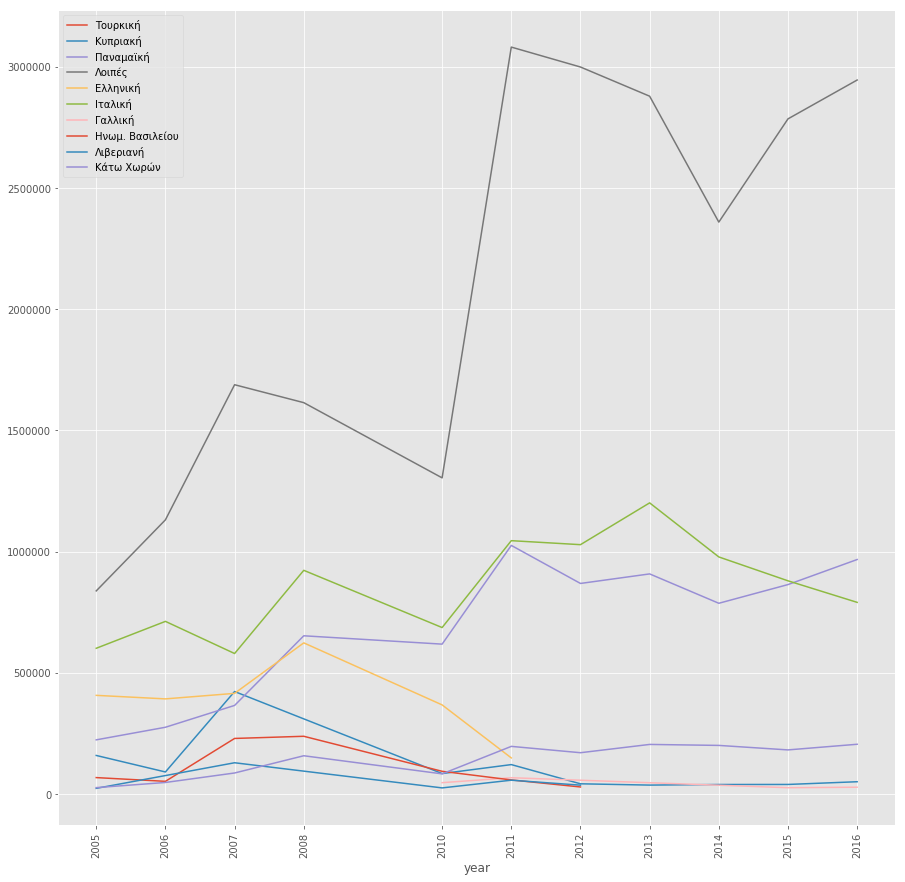

In [22]:
plt.figure(figsize=(15,15))
for country in data.flag.drop_duplicates().values[:-3]:
    ddf = data.groupby(['flag','year']).sum().passengers_arriving
    c = ddf[ddf>20000][country]
    if c.shape[0] ==0:
        pass
    else:
        c.plot(label=country)
        plt.xticks(c.index, years, rotation='vertical');
plt.legend()

## Arrivals

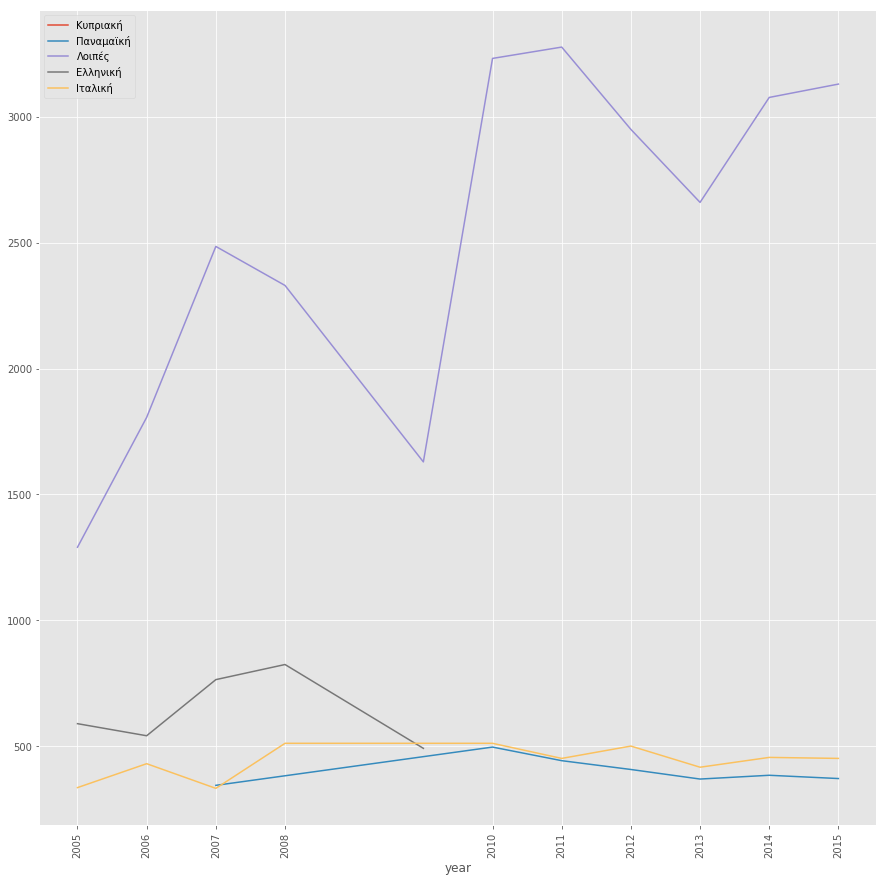

In [23]:
plt.figure(figsize=(15,15))
for country in data.flag.drop_duplicates().values[:-3]:
    ddf = data.groupby(['flag','year']).sum().arrivals
    c = ddf[ddf>300][country]
    if c.shape[0] ==0:
        pass
    else:
        c.plot(label=country)
        plt.xticks(c.index, years, rotation='vertical');
plt.legend()

## Disembarked

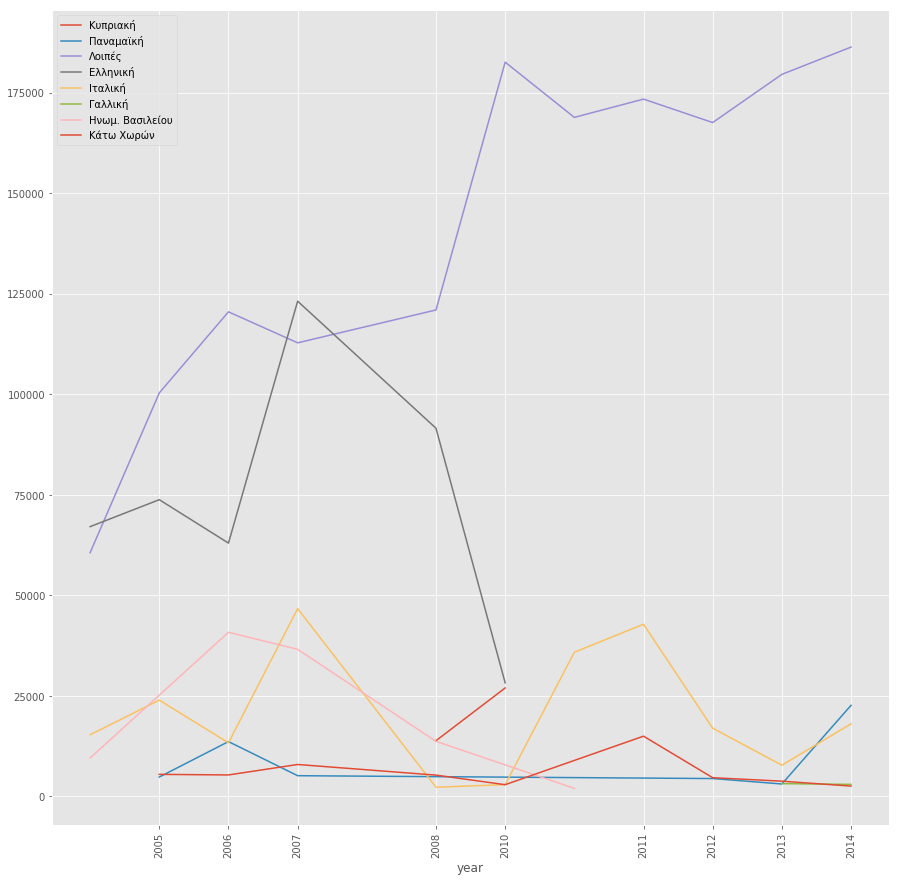

In [24]:
plt.figure(figsize=(15,15))
for country in data.flag.drop_duplicates().values[:-3]:
    ddf = data.groupby(['flag','year']).sum().disembarked
    c = ddf[ddf>2000][country]
    if c.shape[0] ==0:
        pass
    else:
        c.plot(label=country)
        plt.xticks(c.index, years, rotation='vertical');
plt.legend();

## Embarked

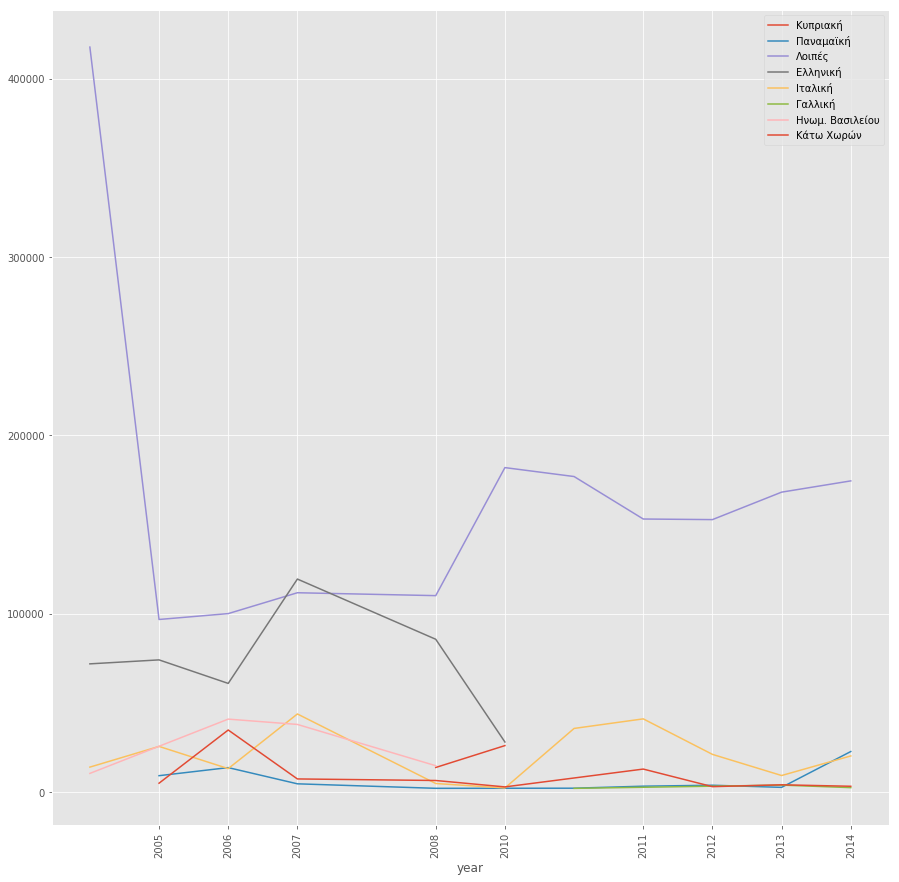

In [25]:
plt.figure(figsize=(15,15))
for country in data.flag.drop_duplicates().values[:-3]:
    ddf = data.groupby(['flag','year']).sum().embarked
    c = ddf[ddf>2000][country]
    if c.shape[0] ==0:
        pass
    else:
        c.plot(label=country)
        plt.xticks(c.index, years, rotation='vertical');
plt.legend();